In [25]:
import pandas as pd
data = pd.read_csv("housing.csv")

In [26]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

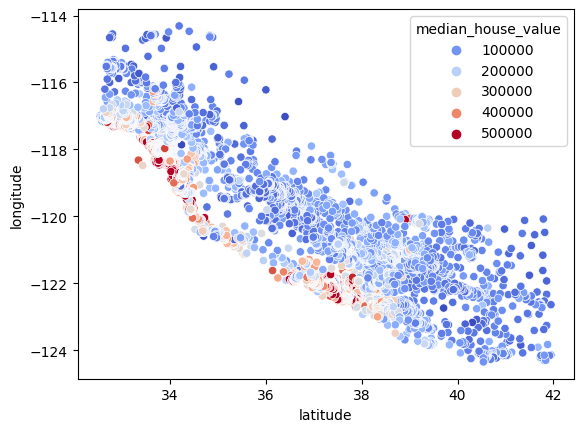

In [27]:
import seaborn as sb
sb.scatterplot(x="latitude",y="longitude", data=data,hue="median_house_value",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

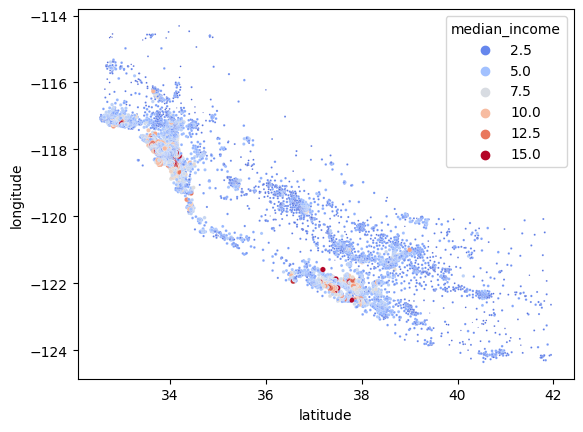

In [28]:
import seaborn as sb
sb.scatterplot(x="latitude",y="longitude", data=data,hue="median_income",palette="coolwarm",s=data["median_income"])

In [29]:
data.loc[:,["latitude","longitude","median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [30]:
from sklearn.cluster import KMeans
x = data.loc[:,["latitude","longitude","median_income"]]
model=KMeans(n_clusters=7)
predict = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
predict.shape

(20640,)

In [32]:
x["economic_segment"] = predict
x

,latitude,longitude,median_income,economic_segment
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,5
4,37.85,-122.25,3.8462,3
...,...,...,...,...
20635,39.48,-121.09,1.5603,3
20636,39.49,-121.21,2.5568,3
20637,39.43,-121.22,1.7000,3
20638,39.43,-121.32,1.8672,3


In [33]:
x["economic_segment"].value_counts()

3    4863
2    4679
4    4510
5    2774
1    1783
0    1673
6     358
Name: economic_segment, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

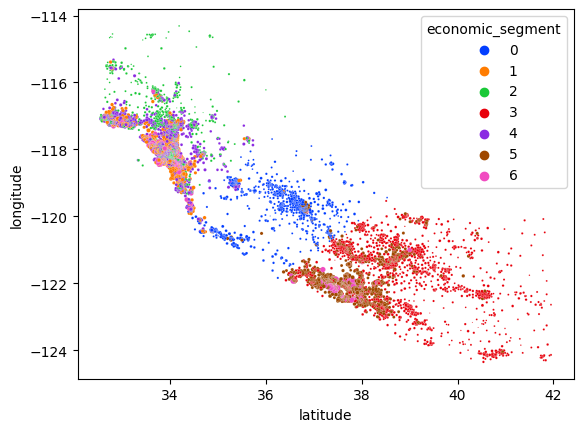

In [35]:
import seaborn as sb
sb.scatterplot(x="latitude",y="longitude", data=x,hue="economic_segment",palette="bright",s=data["median_income"])

<Axes: xlabel='economic_segment', ylabel='count'>

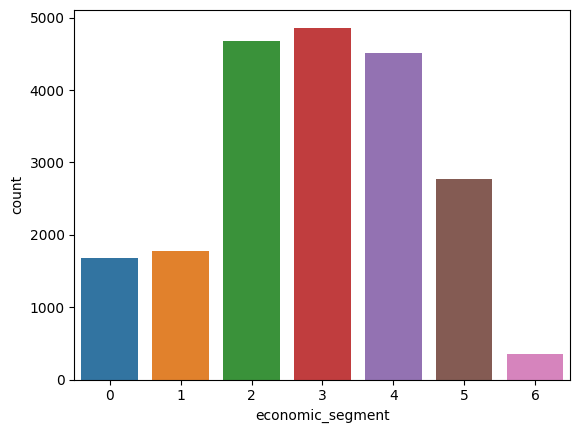

In [36]:
sb.countplot(x="economic_segment",data=x)

In [37]:
x.groupby(["economic_segment"])["median_income"].mean()

economic_segment
0     2.658984
1     6.621887
2     2.428544
3     2.820155
4     4.247198
5     5.505699
6    11.536597
Name: median_income, dtype: float64